## Lab 7 Radio Imaging

In [198]:
# Import all the useful libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit
import glob

### Part 1: Azimuth Data

In [193]:
# Read the azimuth data
data_folder = '/Users/yuchenzhang/Desktop/Lab_7_data/Radio_Data_Sun/sun_azimuth/'
az_files = glob.glob(data_folder + "sun_az*") #Grabs all of the files starting with "sun_az" in your data folder.
az_files.sort()

In [199]:
# Pull out relevant data from files
az_spectra = []

for az_file in az_files: 
    with open(az_file) as az_data: 
        spectrum_rows = []    
        for j, row in enumerate(az_data, start=1): 
            if j%4 == 0:
                spectrum_rows.append(row)
                
        tot_spectrum = np.zeros(1024) 
        for row in spectrum_rows: 
            temp_spec = row.split(' ') 
            spec = [] 
            for val in temp_spec: 
                if val != '' and val != '\n': 
                    spec.append(val)                   
            tot_spectrum = tot_spectrum + np.float64(spec)            
        az_spectra.append(tot_spectrum)

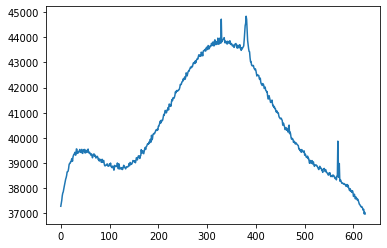

In [200]:
# Chop part of graph that is good to use
plt.plot(az_spectra[0][75:700])

In [201]:
# Generate a frequency array based on the bandwidth
max_freq = 1426.000
min_freq = 1416.000
bandwidth = 0.009766
frequency = np.arange(min_freq, max_freq, bandwidth)

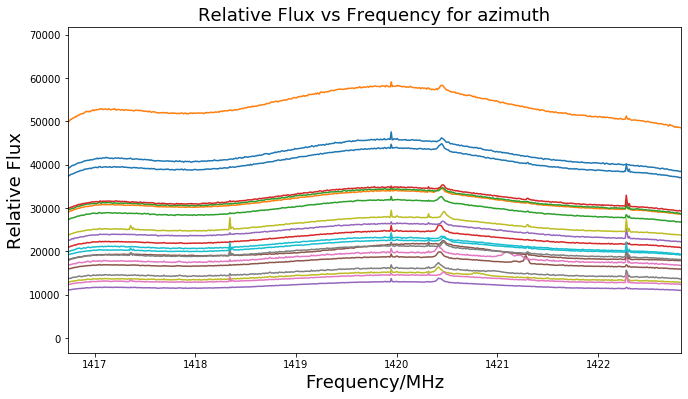

In [202]:
# plot spectra as frequency vs flux
fig, ax = plt.subplots(1,1, figsize=(11,6))
for spec in az_spectra:
    ax.plot(frequency, spec)
plt.title("Relative Flux vs Frequency for azimuth",fontsize=18)
plt.xlabel("Frequency/MHz",fontsize=18)
plt.ylabel("Relative Flux",fontsize=18)
plt.xlim(1416.73245,1422.826434)
plt.show()

In [211]:
# Create the az_level and mean value arrays
az_levels = np.arange(-9.0, 11.0, 1.0)
mean_val = np.mean(az_spectra, axis=1)

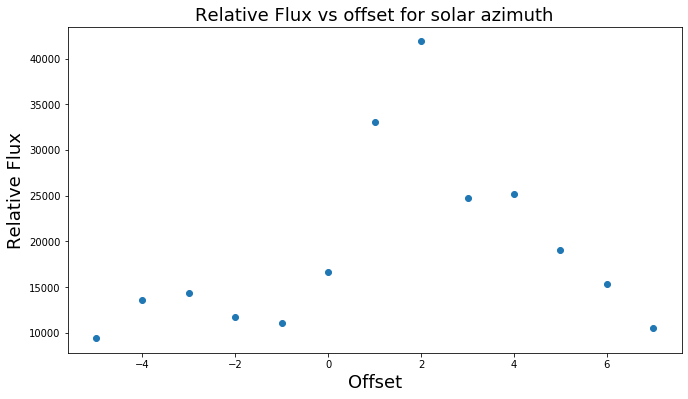

In [212]:
# Chop part of graph that is good to use
plt.figure(figsize=(11, 6))
plt.scatter(az_levels[4:17:1], mean_val[4:17:1])
plt.title("Relative Flux vs offset for solar azimuth",fontsize=18)
plt.xlabel("Offset",fontsize=18)
plt.ylabel("Relative Flux",fontsize=18)
plt.show()

In [204]:
# curvefit 
from scipy.optimize import curve_fit

# Guess the Gaussian Relationship
def Gaussian(x,a,b,c):
    return a*np.exp(-(x-b)**2/(2*c**2))

# manually fit the curve to obtain a viable set of starting parameters
guess =[35000,1,7]

# execute the curve fit
coeffs, fiterr = curve_fit(Gaussian, az_levels[4:18:1], mean_val[4:18:1], p0=guess)

a=28743.697464108714, b=2.257273278856482


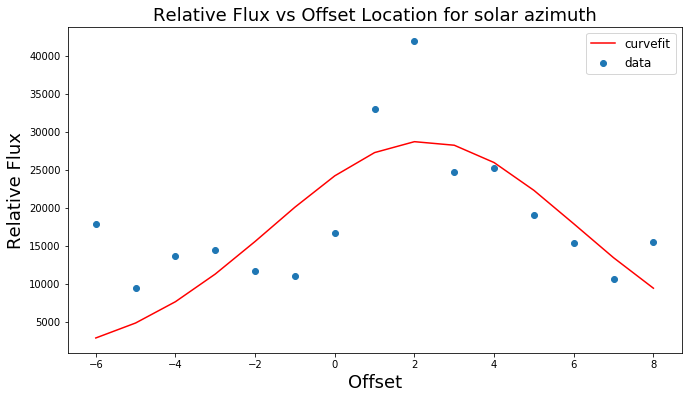

In [205]:
# plot the results
print ("a=%s, b=%s" % (coeffs[0], coeffs[1]))
plt.figure(figsize=(11, 6))
plt.scatter(az_levels[3:18:1], mean_val[3:18:1], label='data')
plt.plot(az_levels[3:18:1], Gaussian(az_levels[3:18:1],*coeffs),'-r', label='curvefit')
plt.legend(fontsize=12)
plt.title("Relative Flux vs Offset Location for solar azimuth",fontsize=18)
plt.xlabel("Offset",fontsize=18)
plt.ylabel("Relative Flux",fontsize=18)
plt.show()

In [207]:
# Calculate the FWHM for azimuth data
FWHM_az = 2*((np.std(az_levels))*(np.sqrt(2*(np.log(2)))))
FWHM_az

13.578554784252464

### Part 2: Elevation

In [175]:
# Read the elevation data
data_folder = '/Users/yuchenzhang/Desktop/Lab_7_data/Radio_Data_Sun/sun_elevation/'
el_files = glob.glob(data_folder + "sun*")
el_files.sort()

In [176]:
# Pull out relevant data from files
el_spectra = []
el_levels = []
elval = ""

for el_file in el_files: 
    name = el_file.split('sun')[-1]
    if name[0]=='m':
        elval= -np.float64(name[1:])
    elif name[0] == 'p':
        elval = np.float64(name[1:])
    el_levels.append(elval)
    
    with open(el_file) as el_data: 
        spectrum_rows = []    
        for j, row in enumerate(el_data, start=1): 
            if j%4 == 0:
                spectrum_rows.append(row)
                
        tot_spectrum = np.zeros(1024) 
        for row in spectrum_rows: 
            temp_spec = row.split(' ') 
            spec = [] 
            for val in temp_spec: 
                if val != '' and val != '\n': 
                    spec.append(val)                   
            tot_spectrum = tot_spectrum + np.float64(spec)            
        el_spectra.append(tot_spectrum)

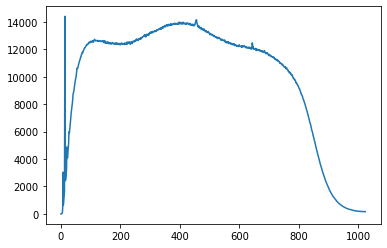

In [208]:
# Check the data reading
plt.plot(el_spectra[0][:])

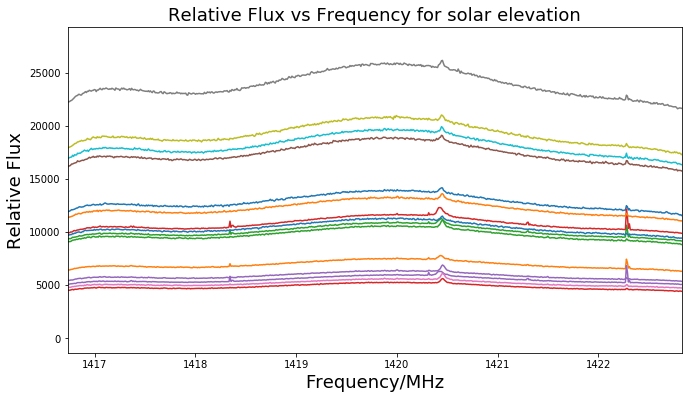

In [210]:
# plot spectra as frequency vs flux for only the "good" part of the data
fig, ax = plt.subplots(1,1, figsize=(11,6))
for spec in el_spectra:
    ax.plot(frequency, spec)
plt.title("Relative Flux vs Frequency for solar elevation",fontsize=18)
plt.xlabel("Frequency/MHz",fontsize=18)
plt.ylabel("Relative Flux",fontsize=18)
plt.xlim(1416.73245,1422.826434)
plt.show()

In [179]:
el_levels = [-5., -4., -3., -2., -1.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]
el_mean_val = np.mean(el_spectra, axis=1)
len(el_mean_val),len(el_levels)

(15, 15)

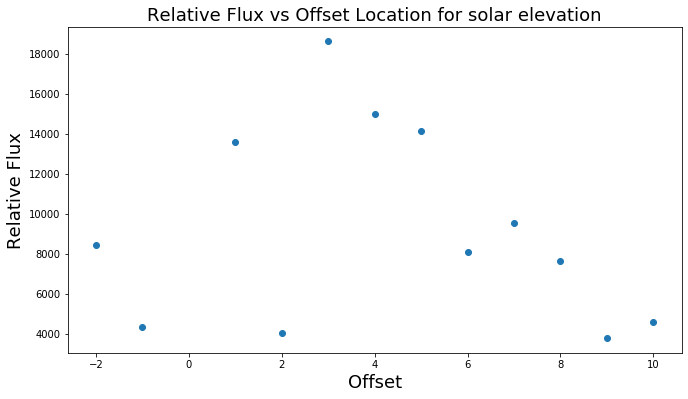

In [191]:
# Chop part of graph that is good to use
plt.figure(figsize=(11, 6))
plt.scatter(el_levels[3:18:1], el_mean_val[3:18:1])
plt.title("Relative Flux vs Offset Location for solar elevation",fontsize=18)
plt.xlabel("Offset",fontsize=18)
plt.ylabel("Relative Flux",fontsize=18)
plt.show()

In [185]:
# curvefit 
from scipy.optimize import curve_fit

# Guess the Gaussian Relationship
def Gaussian(x,a,b,c):
    return a*np.exp(-0.5*(((x-b)/(2**0.5)*c**2))**2)

# manually fit the curve to obtain a viable set of starting parameters
guess =[16000,3,2]

# execute the curve fit
coeffs, fiterr = curve_fit(Gaussian, el_levels, el_mean_val, p0=guess)

a=12321.704922356186, b=2.6894783003876985


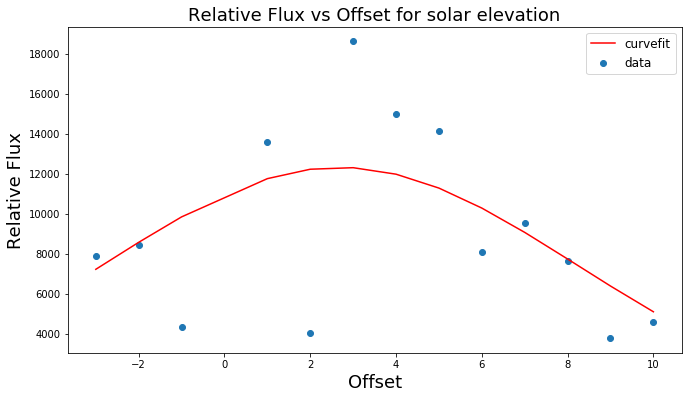

In [186]:
# plot the results
print ("a=%s, b=%s" % (coeffs[0], coeffs[1]))
plt.figure(figsize=(11, 6))
plt.scatter(el_levels[2:18:1], el_mean_val[2:18:1], label='data')
plt.plot(el_levels[2:18:1], Gaussian(el_levels[2:18:1],*coeffs),'-r', label='curvefit')
plt.legend(fontsize=12)
plt.title("Relative Flux vs Offset for solar elevation",fontsize=18)
plt.xlabel("Offset",fontsize=18)
plt.ylabel("Relative Flux",fontsize=18)
plt.show()

In [187]:
FWHM_el = 2*((np.std(el_levels))*(np.sqrt(2*(np.log(2)))))
FWHM_el

11.100728148769303